# 多重派发

**多重派发**是这篇notebook要探索的Julia的一个关键特性。

它有助于快速开发。它也让软件可拓展、可设计和更好把玩。

它可能是并行计算取得重大突破的预兆。

## 大纲
1. 罗马数字
2. 函数
3. 并行计算

## 1. 罗马数字（玩玩）

我们来定义一个**新结构**表示罗马数字。为了方便写代码，我们将只考虑 0 到 9。

**练习**：拓展到更大的数字。（别忘了罗马数字是十进制计数系统！）

In [1]:
struct Roman
    n::Int
end

Base.show(io::IO, r::Roman) = print(io, 'ⅰ' + (r.n - 1) % 10 )  # 漂亮的显示；'ⅰ'是一个Unicode罗马数字

我们可以像这样创建一个这个类型的对象：

In [2]:
Roman(4)

ⅳ

In [3]:
typeof.([5 5.0 Roman(5) "Five" '5'  5//1])

1×6 Matrix{DataType}:
 Int64  Float64  Roman  String  Char  Rational{Int64}

用罗马数字漂亮地打印数组：

In [4]:
x = [7 1 2 5 8 9]
Roman.(x)   # equivalent to map(Roman, x)  or  [Roman(w) for w in x]

1×6 Matrix{Roman}:
 ⅶ  ⅰ  ⅱ  ⅴ  ⅷ  ⅸ

要是能像普通数字那样给罗马数字做加法就好了：

In [5]:
Roman(4) + Roman(5)

MethodError: MethodError: no method matching +(::Roman, ::Roman)
The function `+` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  +(!Matched::Rational{BigInt}, !Matched::Rational{BigInt})
   @ Base gmp.jl:1056
  +(!Matched::Bool, !Matched::Complex{Bool})
   @ Base complex.jl:308
  ...


但 Julia 不知道该怎么做。
我们可以通过 `import` 函数 `+` 并拓展它的定义来教 Julia 给罗马数字做加法：

In [6]:
import Base: +, *

+(a::Roman, b::Roman) = Roman(a.n + b.n)

+ (generic function with 199 methods)

In [7]:
Roman(4) + Roman(5)

ⅸ

这样就给函数 `+` **添加了一个新方法**：

In [8]:
methods(+)

# 199 methods for generic function "+" from Base:
   [1] +(x::Rational{BigInt}, y::Rational{BigInt})
     @ Base.GMP.MPQ gmp.jl:1056
   [2] +(x::Bool, z::Complex{Bool})
     @ complex.jl:308
   [3] +(x::Bool, y::Bool)
     @ bool.jl:166
   [4] +(x::Bool)
     @ bool.jl:163
   [5] +(x::Bool, z::Complex)
     @ complex.jl:315
   [6] +(x::Real, z::Complex{Bool})
     @ complex.jl:322
   [7] +(x::Bool, y::T) where T<:AbstractFloat
     @ bool.jl:173
   [8] +(a::Pkg.Resolve.VersionWeight, b::Pkg.Resolve.VersionWeight)
     @ Pkg.Resolve /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Pkg/src/Resolve/versionweights.jl:22
   [9] +(a::Roman, b::Roman)
     @ Main ~/Documents/coderepos/Julia_Tutorials/zh-cn/intro-to-julia-ZH/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X15sZmlsZQ==.jl:3
  [10] +(::Missing, ::Missing)
     @ missing.jl:122
  [11] +(::Missing)
     @ missing.jl:101
  [12] +(x::Missing, y::Dates.AbstractTime)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:91
  [13] +(::Missing, ::Number)
     @ missing.jl:123
  [14] +(dt::Dates.Date, t::Dates.Time)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:21
  [15] +(dt::Dates.Date, y::Dates.Year)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:29
  [16] +(dt::Dates.Date, z::Dates.Month)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:56
  [17] +(x::Dates.Date, y::Dates.Quarter)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:75
  [18] +(x::Dates.Date, y::Dates.Week)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:79
  [19] +(x::Dates.Date, y::Dates.Day)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:81
  [20] +(dt::Dates.DateTime, y::Dates.Year)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:25
  [21] +(dt::Dates.DateTime, z::Dates.Month)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:49
  [22] +(x::Dates.DateTime, y::Dates.Quarter)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:77
  [23] +(x::Dates.DateTime, y::Dates.Period)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:83
  [24] +(level::Base.CoreLogging.LogLevel, inc::Integer)
     @ Base.CoreLogging logging/logging.jl:132
  [25] +(z::Complex{Bool}, x::Bool)
     @ complex.jl:309
  [26] +(z::Complex{Bool}, x::Real)
     @ complex.jl:323
  [27] +(z::Complex, x::Bool)
     @ complex.jl:316
  [28] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/periods.jl:335
  [29] +(x::Dates.CompoundPeriod, y::Dates.Period)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/periods.jl:333
  [30] +(x::Dates.CompoundPeriod, y::Dates.TimeType)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/periods.jl:363
  [31] +(B::BitMatrix, J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/LinearAlgebra/src/uniformscaling.jl:151
  [32] +(t::Dates.Time, dt::Dates.Date)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:22
  [33] +(x::Dates.Time, y::Dates.TimePeriod)
     @ Dates /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Dates/src/arithmetic.jl:85
  [34] +(a::Pkg.Resolve.FieldValue, b::Pkg.Resolve.FieldValue)
     @ Pkg.Resolve /opt/homebrew/Cellar/julia/1.11.5/share/julia/stdlib/v1.11/Pkg/src/Resolve/fieldvalues.jl:43
  [35] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat)
     @ Base.MPFR mpfr.jl:678
  [36] +(x::BigFloat, y::BigFloa

In [9]:
@which Roman(4) + Roman(5)

+(a::Roman, b::Roman)
     @ Main ~/Documents/coderepos/Julia_Tutorials/zh-cn/intro-to-julia-ZH/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X15sZmlsZQ==.jl:3

In [10]:
import Base.*
*(i::Roman, j::Roman) = Roman(i.n * j.n)                     # Multiply like a Roman

* (generic function with 222 methods)

In [11]:
Roman(3) * Roman(2)

ⅵ

In [12]:
Roman.(1:3) .* [Roman(1) Roman(2) Roman(3)]

3×3 Matrix{Roman}:
 ⅰ  ⅱ  ⅲ
 ⅱ  ⅳ  ⅵ
 ⅲ  ⅵ  ⅸ

但是我们的乘法仍有一些问题

In [13]:
Roman(3) * 2

MethodError: MethodError: no method matching *(::Roman, ::Int64)
The function `*` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  *(::Roman, !Matched::Roman)
   @ Main ~/Documents/coderepos/Julia_Tutorials/zh-cn/intro-to-julia-ZH/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:2
  *(!Matched::Missing, ::Number)
   @ Base missing.jl:123
  ...


In [14]:
# mytimes 函数目前基于类型来判断该做什么，很复杂
# 不用担心，更好的方法马上就来
function mytimes(i,j)
  if isa(i,Roman) & isa(j,Number)
        return  fill(1, i.n, j)   # i by j matrix with ones
    elseif    isa(i,Number) & isa(j,Roman) 
        return "😄"^ (i*j.n)   #  i * j happy faces
    else
        return("I Don't know")
    end
end

mytimes (generic function with 1 method)

In [15]:
mytimes(4,Roman(3)) # 12个笑脸

"😄😄😄😄😄😄😄😄😄😄😄😄"

In [16]:
mytimes(Roman(4),3) # 4x3的全1矩阵

4×3 Matrix{Int64}:
 1  1  1
 1  1  1
 1  1  1
 1  1  1

最简单的实现方式是明确定义一个 `Roman` 和一个数字的乘法。我们可以按我们的想法来定义：

In [17]:
*(i::Number, j::Roman) = "😄"^ (i*j.n)    # i * j个笑脸

*(i::Roman, j::Number) =   fill(1, i.n, j) # i * j的矩阵

* (generic function with 224 methods)

In [18]:
3 * Roman(3) # 9个笑脸

"😄😄😄😄😄😄😄😄😄"

In [19]:
Roman(3) * 5  # 3*5的全1矩阵

3×5 Matrix{Int64}:
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1

In [20]:
t(x::Roman,y::Roman) = x.n * y.n

t (generic function with 1 method)

In [21]:
t(Roman(5),Roman(4))

20

In [22]:
# 注意它的汇编代码是多紧凑！
@code_native t(Roman(2),Roman(4))

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	_julia_t_11287                  ; -- Begin function julia_t_11287
	.p2align	2
_julia_t_11287:                         ; @julia_t_11287
; Function Signature: t(Main.Roman, Main.Roman)
; ┌ @ /Users/shufanzhang/Documents/coderepos/Julia_Tutorials/zh-cn/intro-to-julia-ZH/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X41sZmlsZQ==.jl:1 within `t`
; %bb.0:                                ; %top
	;DEBUG_VALUE: t:x <- [DW_OP_deref] [$x0+0]
	;DEBUG_VALUE: t:x <- [DW_OP_deref] [$x0+0]
	;DEBUG_VALUE: t:y <- [DW_OP_deref] [$x1+0]
	;DEBUG_VALUE: t:y <- [DW_OP_deref] [$x1+0]
; │┌ @ int.jl:88 within `*`
	ldr	x8, [x0]
	ldr	x9, [x1]
	mul	x0, x9, x8
	ret
; └└
                                        ; -- End function
.subsections_via_symbols


## 函数

In [23]:
import Base: *, +, ^

In [24]:
*(α::Number,   g::Function) = x -> α * g(x)   # 标量乘以函数

*(f::Function, λ::Number)   = x -> f(λ * x)   # Scale the argument

*(f::Function, g::Function) = x -> f(g(x))    # 复合函数  -- 滥用符号！  在Julia0.6中使用 \circ

^(f::Function, n::Integer) = n == 1 ? f : f*f^(n-1) # 一个通过递归乘法实现的天真的求幂算法

^ (generic function with 70 methods)

In [25]:
+(f::Function, g::Function) = x -> f(x) + g(x)

+ (generic function with 200 methods)

举个例子，定义成这样的指数函数

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n.$$

我们可以把它看成是这样的函数：

$$\exp = \sum_{n=0}^\infty \frac{1}{n!} \mathrm{pow}_n,$$

其中 $\mathrm{pow}_n(x) = x^n$.

（开始用数字模糊符号！）

In [26]:
pow(n) = x -> x^n

myexp = x -> sum(1/factorial(big(n)) * pow(n)(x) for n in 0:100)   # 效率低的泰勒级数！

#21 (generic function with 1 method)

In [27]:
[myexp(1); exp(1); exp(big(1))]

3-element Vector{BigFloat}:
 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
 2.718281828459045090795598298427648842334747314453125
 2.718281828459045235360287471352662497757247093699959574966967627724076630353555

In [28]:
f = x -> x^2
f(10)

100

In [29]:
g = 3f
g(10)

300

In [30]:
(f^2)(10)  # 因为我们已经定义了函数乘法为符合函数

10000

In [31]:
using Plots;
gr()

Plots.GRBackend()

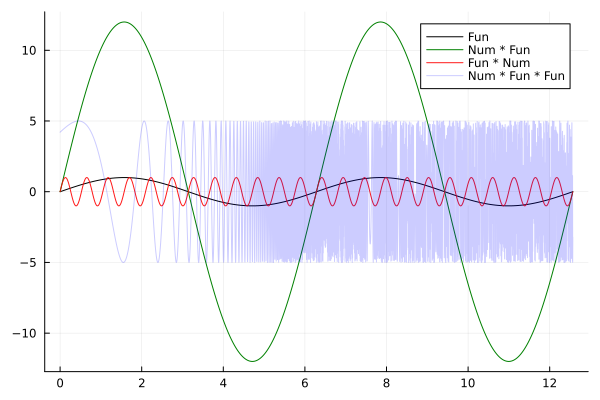

In [32]:
x = pi*(0:0.001:4)

plot( x,  sin.(x),        c="black",            label="Fun")
plot!(x, (12*sin).(x),    c="green",            label="Num * Fun")
plot!(x, (sin*12).(x),    c="red",   alpha=0.9, label="Fun * Num")
plot!(x, (5*sin*exp).(x), c="blue",  alpha=0.2, label="Num * Fun * Fun")

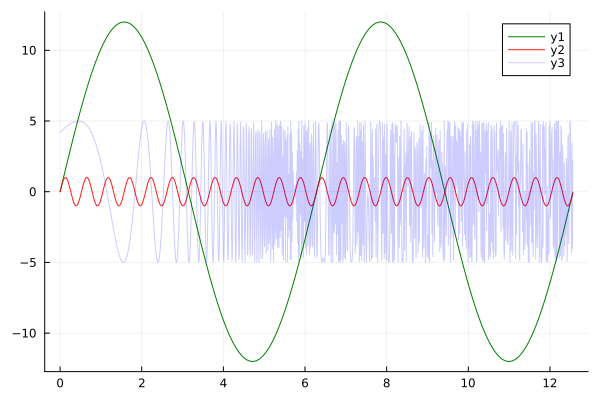

In [33]:
plot([12*sin, sin*12, 5*sin*exp], 0:.01:4π, α=[1 .9 .2], c=[:green :red :blue])

> “我很讨厌 $sin^2 \phi$，虽然 Laplace 用过它；
> 应该要担心 $sin^2 \phi$ 可能会引起歧义，如果说 $sin(\phi^2)$ 就不会或者说几乎不会引起歧义了，那么我们应该写 $(sin \phi)^2$，而不是 $sin^2 \phi$，以此类推 $sin^2 \phi$应该指的是 $sin(sin \phi)$。” 
> 
> —— Gauss

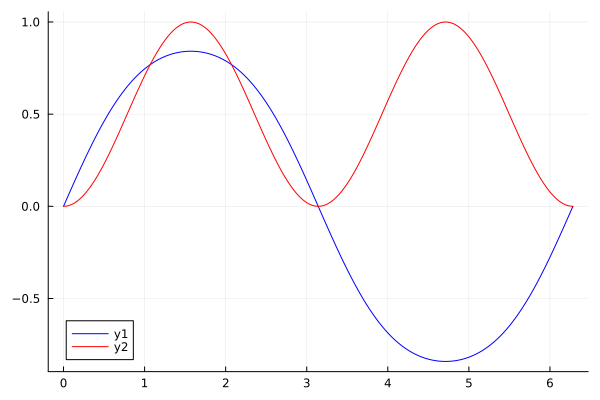

In [34]:
x=(0:.01:2) * pi;

plot(x, (sin^2).(x), c="blue")     # 乘方能工作，y=sin(sin(x))，Gauss会开心的！
plot!(x, sin.(x).^2, c="red")         

## 练习

In [35]:
h(a, b::Any) = "fallback"
h(a::Number, b::Number) = "a and b are both numbers"
h(a::Number, b) = "a is a number"
h(a, b::Number) = "b is a number"
h(a::Integer, b::Integer) = "a and b are both integers"

h (generic function with 5 methods)

In [36]:
# 试着把玩 h，尝试使用 h 的 5 种方法
# 在此作答